### celeba 이미지 데이터 생성

In [1]:
# CelebA : 유명인(Celebrity) 얼굴 데이터셋(Face Dataset)

# 변수 40개, 20만개 이상의 이미지
# http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html

%time

#이미지 파일들을 h5py 파일로 압축하는 과정(오래걸림, 15~20분)
import h5py
import zipfile
import imageio
import os

hdf5_file = 'c:/workspace3/data/images/celeba/celeba_aligned_small.h5py'
total_images = 20000

with h5py.File(hdf5_file, 'w') as hf:
    count = 0
    with zipfile.ZipFile('c:/workspace3/data/images/celeba/img_align_celeba.zip', 'r') as zf:
      for i in zf.namelist():
        if (i[-4:] == '.jpg'):
          # extract image
          ofile = zf.extract(i)
          img = imageio.v2.imread(ofile)
          os.remove(ofile)

          # 이미지 데이터를 h5py 모델에 추가하는 과정
          hf.create_dataset('c:/workspace3/data/images/celeba/img_align_celeba/'+str(count)+'.jpg', data=img, compression="gzip", compression_opts=9)
       
          count = count + 1
          if count%1000 == 0:
            print("images done .. ", count)
          if count == total_images:
            break

CPU times: total: 0 ns
Wall time: 0 ns
images done ..  1000
images done ..  2000
images done ..  3000
images done ..  4000
images done ..  5000
images done ..  6000
images done ..  7000
images done ..  8000
images done ..  9000
images done ..  10000
images done ..  11000
images done ..  12000
images done ..  13000
images done ..  14000
images done ..  15000
images done ..  16000
images done ..  17000
images done ..  18000
images done ..  19000
images done ..  20000


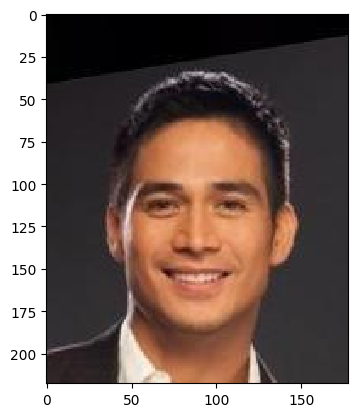

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import h5py

with h5py.File('c:/workspace3/data/images/celeba/celeba_aligned_small.h5py', 'r') as fp:
  dataset = fp['c:/workspace3/data/images/celeba/img_align_celeba']
  image = np.array(dataset['11.jpg'])

  plt.imshow(image, interpolation='none')  

In [2]:
image.shape

(218, 178, 3)